In [1]:
%pylab inline
#%matplotlib notebook
import glob
import os
import imp
import scipy.signal as sig
from matplotlib import image as im
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import ticker
#import pywt 
from scipy import ndimage
from numpy import fft
#from pywt import thresholding as thr
#import nbsp
#exec(compile(open('/home/nicolas/Documentos/Universidad/Sources/Fluorescencia semi_inf/FlDPDW.py').read()))


Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_images (path, query, binning):
    files = glob.glob(path + query)
    files.sort()
    ascs = []
    filenames = []
    for i in files:
        filenames.append(os.path.basename(i))
        ascs.append(ndimage.zoom(np.genfromtxt(i), 1/binning, order=0))
    images_arr = np.asarray(ascs)
    print("Archivos cargados: " + str(images_arr.shape[0]))
    print(filenames)
    return images_arr, filenames

In [3]:
def fft_gauss (in_array, kernel_size):
    
    # FFT filter
    im_fft = fft.rfftn(in_array)
    im_rfft_filtered = ndimage.fourier_gaussian(im_fft, kernel_size, in_array.shape[1])
    im_filtered = fft.irfftn(im_rfft_filtered)
    
    #Power spectrum       
    pwr_spectrum = abs(fft.fftshift(im_fft))**2
    pwr_spectrum_filtered = abs(fft.fftshift(im_rfft_filtered))**2
        
    #Re-normalization
    #for i in np.arange(in_array.shape[0]):
    sum_ratio= in_array.sum()/im_filtered.sum()
    im_filtered = im_filtered*sum_ratio
    
    return im_filtered, pwr_spectrum, pwr_spectrum_filtered

#Vector version
#vfft_gauss = np.vectorize(fft_gauss, excluded = ['kernel_size', 'array_size'], otypes = [np.ndarray] )

In [4]:
def calc_profiles_h (array_divs, inclusion_xposition, filenames, sources, prof_length): 
    profiles = dict()
    imgplts = dict()
    
    
    for name in filenames:
        prof_points = array_divs[filenames.index(name)][inclusion_xposition]    
        profiles[name] = prof_points
        
        
    return profiles

In [5]:
 def save_2dimages (array_divs, filenames, path, suffix, extension, 
                    vmin=None, vmax=None, cb=1, clabel='Normalized intensity'):
    font = {'family' : 'ubuntu',
            'weight' : 'normal',
            'size'   : 18}

    matplotlib.rc('font', **font)
    for name in filenames:
        #prof_angle = np.math.atan((sources[1]-inclusion_position[1])/(sources[0]-inclusion_position[0]))
        #prof_end = (round(sources[0]-np.math.cos(prof_angle)*prof_length, 0), round(sources[1]-np.math.sin(prof_angle)*prof_length, 0))
        fig = plt.figure()
        plt.imshow(array_divs[filenames.index(name)], vmin=vmin, vmax=vmax)
        if cb==1:
            cbar = plt.colorbar()
            cbar.set_label(clabel)
            #cbar.ax.tick_params(labelsize=20) 
            tick_locator = ticker.MaxNLocator(nbins=4)
            cbar.locator = tick_locator
            cbar.update_ticks()
        plt.axis('image')
        fig.savefig(path + name + suffix + extension )


In [6]:
#Load MC images
sep = "21"
prof = "135"
binning = 1
laser = (25,0)
sources = [0,1,2,3]
path="/home/nicolas/Documentos/Universidad/Simulaciones/3cyls/"
images, filenames = load_images(
    path, "inclusion-3cyls-z1*_FlR.dat", binning)

Archivos cargados: 4
['inclusion-3cyls-z1-zs0_FlR.dat', 'inclusion-3cyls-z1-zs1_FlR.dat', 'inclusion-3cyls-z1-zs2_FlR.dat', 'inclusion-3cyls-z1-zs3_FlR.dat']


In [7]:
#Load backgroud

#single
#image_fondo = ndimage.zoom(np.genfromtxt("/home/nicolas/Documentos/Universidad/Sources/CUDA/CUDAMCFL/CompTeo3/fondo-v2-3d-gs5_FlR.dat"), 1/binning, order=0)
#imshow (image_fondo)

#multiple (check load order!)
images_fondo, filenames_fondo = load_images(path, "fondo-3cyls-*_FlR.dat", binning)

Archivos cargados: 4
['fondo-3cyls-zs0_FlR.dat', 'fondo-3cyls-zs1_FlR.dat', 'fondo-3cyls-zs2_FlR.dat', 'fondo-3cyls-zs3_FlR.dat']


In [8]:
#Division and substraction
images_div = images/images_fondo
images_sub = images-images_fondo

In [9]:
#fondo = images_fondo[0]
#inclusion = images_fluo[0]
#images_div_fluo = images_fluo/images_fondo[filenames_fondo.index(fondo)]

In [10]:
#images_div_fluo_smooth = fft_gauss(images_div_fluo, 3, images_fluo[0].shape)[0]
#imshow(images_div_fluo_smooth[filenames_fluo.index("lf" + prof + "_40g.asc")])
#fondo_fft = fft_gauss(images_fondo[filenames_fondo.index(fondo)], 4, 
#                      images_fondo[filenames_fondo.index(fondo)].shape)[0]

#images_div_fluo_smooth = []
#for index, item in enumerate(images_div_fluo):
    #print(index)
#    images_div_fluo_smooth.append(fft_gauss(item, 4, images_fluo[0].shape)[0])
    
#images_sub_fluo_smooth = []
#for index, item in enumerate(images_sub_fluo):
    #print(index)
#    images_sub_fluo_smooth.append(fft_gauss(item, 4, item.shape)[0])
    
#images_fluo_fft = []
#for index, item in enumerate(images_fluo):
    #print(index)
#    images_fluo_fft.append(fft_gauss(item, 4, images_fluo[0].shape)[0])

#images_div_fluo_smooth2= images_fluo_fft/fondo_fft

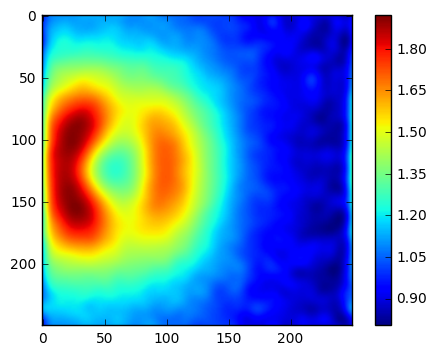

In [11]:
plt.imshow(fft_gauss(images_div[3],5)[0])
cbar = plt.colorbar()

In [12]:
profs_fluo = calc_profiles_h(images_div, 133, filenames_fluo, (0,0), 125)
#profs_fluo_smooth2 = calc_profiles_h(images_div_fluo_smooth2, 133, filenames_fluo, (0,0), 125)
#profs_fluo_smooth = calc_profiles_h(images_div_fluo_smooth,133, filenames_fluo, (0,0), 125)
#plot(profs_fluo_smooth["inclusion-x21-z115_Fl.dat"])
#plot(profs_fluo_smooth[profs_fluo_smooth.keys()[2]])
#plot(profs_fluo_smooth[list(profs_fluo_smooth)[0]])

NameError: name 'filenames_fluo' is not defined

In [13]:
#save_2dimages(images_div_fluo, (133,0), filenames_fluo, laser, 250/binning, path, "_noFFT", ".png")
#save_2dimages(images_div_fluo_smooth, (133,0), filenames_fluo, laser, 250/binning, path, "_FFT", ".png")

# Write Profiles
xaxis = np.linspace(-1, 9, 250)

for index, item in enumerate(profs_fluo_smooth):
    savetxt(path + "inclusion-" + str(item) + "-prof", vstack([xaxis, profs_fluo_smooth[str(item)]]).T)
    
for index, item in enumerate(profs_fluo_smooth):
    savetxt(path + "inclusion-" + str(item) + "-prof-noFil", vstack([xaxis, profs_fluo[str(item)]]).T)

In [14]:
#inc_delta_gs = (images_fluo-images_fluo[3])/images_fluo[3]*100
#div_delta_gs = images_div_fluo/images_div_fluo[3]

# Calculate deltas

inc_delta_gs_smooth = []
for index, item in enumerate(inc_delta_gs):
    #print(index)
    inc_delta_gs_smooth.append(fft_gauss(item, 4, images_fluo[0].shape)[0])

div_delta_gs_smooth = []
for index, item in enumerate(div_delta_gs):
    #print(index)
    div_delta_gs_smooth.append(fft_gauss(item, 4, images_fluo[0].shape)[0])

In [15]:
#save_2dimages(inc_delta_gs, (133,0), filenames_fluo, laser, 250/binning, path, "_inc_delta-gs", ".png")
#save_2dimages(inc_delta_gs_smooth, (133,0), filenames_fluo, laser, 250/binning, path, "_inc_delta-gs-FFT", 
              #".png", clabel='Difference [%]', vmax=10)

In [16]:
#save_2dimages(div_delta_gs, (133,0), filenames_fluo, laser, 250/binning, path, "_div_delta-gs", ".png")
#save_2dimages(div_delta_gs_smooth, (133,0), filenames_fluo, laser, 250/binning, path, "_div_delta-gs-FFT", ".png", vmax=1.05)

# Calculo sensibilidad
import FlDPDW as dpdw
import numpy as np

# Parameters initialization
n = 1.33
v = 29979245800/n 
M0 = 1.
w = 0.

# Variable parameters
n = 1.33
d = 5. #Slab width
N_tissue = 10
N_inclusion = 50
mua_ex_medium = 0.04+N_tissue*1e-9*339625
mua_ex_inc = 0.08+N_inclusion*1e-9*339625
mua_fl_medium = 0.04+N_tissue*1e-9*219500
mua_fl_inc = 0.08+N_inclusion*1e-9*219500
print (mua_ex_medium, mua_fl_medium, mua_ex_inc, mua_fl_inc)
tissue = dpdw.PO(1.33, mua_ex_medium, 9.6, mua_fl_medium, 9.6, 6e4, N_tissue*1e-9, 0.58e-9) #mua (muatis_ex), mups, muaf (muatis_fl), mupsf, sigma, concentration, tau
inclusion = dpdw.PO(1.33, mua_ex_inc, 9.6, mua_fl_inc, 9.6, 6e4, N_inclusion*1e-9, 0.58e-9) #mua (muadye_ex), mups, muaf (muadye_fl), mupsf, sigma, concentration, tau
inclusion_radius = 0.595
source = [0.,0.,0.]

#y coordinate index for calculations and plots
Npoints= 100
index = np.linspace(0, 10, Npoints)

Npoints_inc = 10
Max_distance = 4

Rad_Prof_sens = []

for ig in np.linspace(0, Max_distance, Npoints_inc):
    fluence_2d_slab2 = []
    fluence_2d_inc_slab2 = []
    fluence_2d_back_slab2 = []
    foreground_slab2 = []
    background_slab2 = []
    M=2
    for i in index:
        foreground_slab2 = dpdw.Phi_Slab2 ([i,0,0.000001], [0,0,0], tissue, inclusion, [-ig,0,1.35], inclusion_radius, d)
        background_slab2 = dpdw.Phi_Slab2 ([i,0,0.000001], [0,0,0], tissue, tissue, [-ig,0,1.35], 0.00001, d)
        fluence_2d_slab2.append(foreground_slab2/background_slab2)
        fluence_2d_back_slab2.append(background_slab2)
        fluence_2d_inc_slab2.append(foreground_slab2)
    #plot(index, fluence_2d_slab2)
    maxprof = np.amax(np.real(fluence_2d_slab2))
    print(maxprof)
    Rad_Prof_sens.append(maxprof)


In [17]:
from scipy import interpolate 
import math
def ToXY(rd_array, dr, Nr, dx, Nx, dy, Ny, x0, y0, rmin):
    xy_array = np.zeros((Nx,Ny), float)
    for x in range(Nx):
        for y in range(Ny):
            xpos = (x+0.5-Nx/2)*dx
            ypos = (y+0.5-Ny/2)*dy
            r_xy2 = (xpos-x0)**2 + (ypos-y0)**2
            if r_xy2 < (Nr*dr)**2 and r_xy2 > rmin :
                r_interpolated = interpolate.interp1d([row[0] for row in rd_array],[row[1] for row in rd_array])
                xy_array[x][y] = r_interpolated(math.sqrt(r_xy2)) #* (1-1*math.exp(math.sqrt(1/(r_xy2-x0))))
            else:
                xy_array[x][y] = 0.
    print(np.shape(xy_array))
    #fig = plt.figure()
    #plt.imshow(xy_array)
    return xy_array

In [25]:
Npoints_inc = 60
Max_distance = 15
col_array=np.loadtxt("/home/nicolas/Documentos/Universidad/Sources/Fluorescencia semi_inf/teo_sens2_z2.0.dat")

In [26]:
images.shape

(4, 250, 250)

In [27]:
XY_Prof_Sens = np.full(images.shape,0,dtype=float)
for xs in range(images.shape[0]):
    XY_Prof_Sens[xs]=(ToXY (col_array, Max_distance/Npoints_inc, Npoints_inc, 0.04, 250, 0.04, 250, 0, -xs,0.2))
    #imshow(XY_Prof_Sens[xs])

(250, 250)
(250, 250)
(250, 250)
(250, 250)


(-0.5, 249.5, 249.5, -0.5)

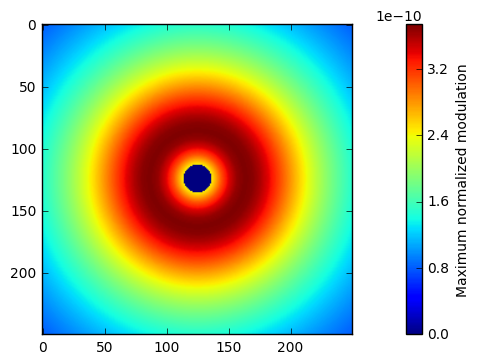

In [28]:
imshow(XY_Prof_Sens[0])
cbar = plt.colorbar()
cbar.set_label("Maximum normalized modulation")
tick_locator = ticker.MaxNLocator(nbins=6)
cbar.locator = tick_locator
cbar.update_ticks()
plt.axis('image')
#fig.savefig(path + "Sens_z2_r0.4.png" )

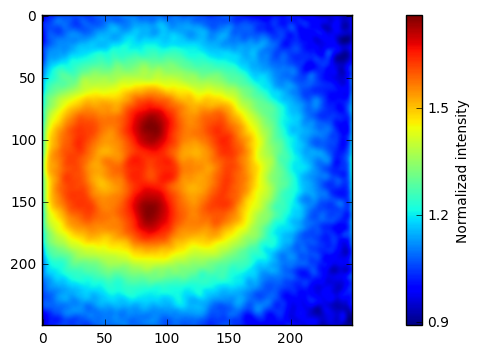

In [29]:
images_div_avg = np.average(images_div, weights=1*(XY_Prof_Sens), axis=0)
#images_div_avg = np.average(images_div-1, weights=1/images_fondo, axis=0)
images_div_avg.shape

fig = plt.figure()
imshow (fft_gauss(images_div_avg,3)[0])
cbar = plt.colorbar()
cbar.set_label("Normalizad intensity")
tick_locator = ticker.MaxNLocator(nbins=4)
cbar.locator = tick_locator
cbar.update_ticks()
plt.axis('image')
fig.savefig(path + "3cyls_avgW_sens2_z2_r04.png" )

(-0.5, 249.5, 249.5, -0.5)

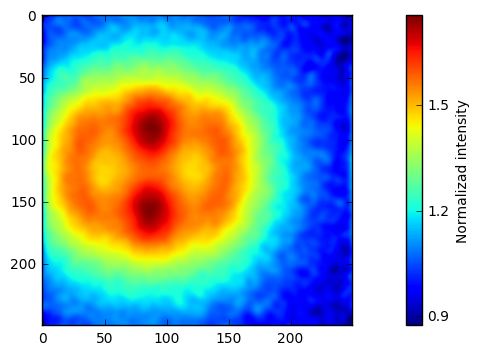

In [48]:
images_div_avg2 = np.average(images_div, axis=0)
fig = plt.figure()
imshow (fft_gauss(images_div_avg2,3)[0])
cbar = plt.colorbar()
cbar.set_label("Normalizad intensity")
tick_locator = ticker.MaxNLocator(nbins=4)
cbar.locator = tick_locator
cbar.update_ticks()
plt.axis('image')
#fig.savefig(path + "3cyls_avg.png" )

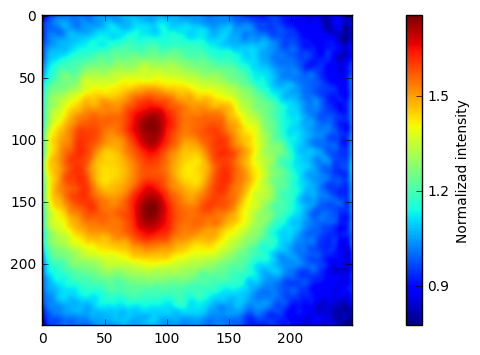

In [33]:
images_div_med = np.median(images_div, axis=0)
fig = plt.figure()
imshow (fft_gauss(images_div_med,3)[0])
cbar = plt.colorbar()
cbar.set_label("Normalizad intensity")
tick_locator = ticker.MaxNLocator(nbins=4)
cbar.locator = tick_locator
cbar.update_ticks()
plt.axis('image')
fig.savefig(path + "3cyls_avg.png" )

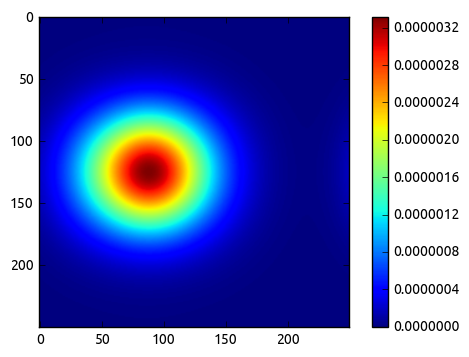

In [71]:
images_sub_med = np.median(images_sub, axis=0)
imshow (fft_gauss(images_sub_med,20)[0])
cbar = plt.colorbar()

/home/nicolas/Documentos/Universidad/Simulaciones/3cyls/
0
1
2
3


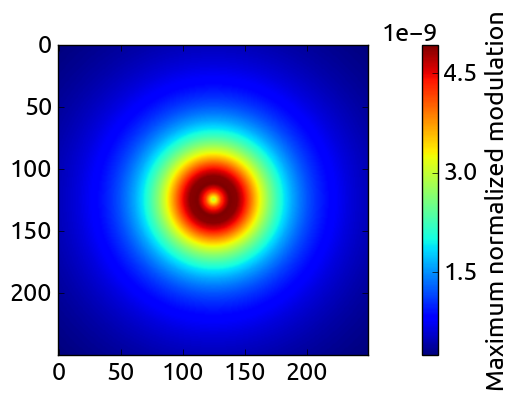

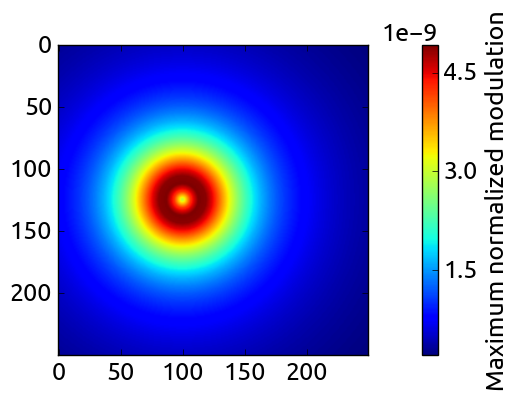

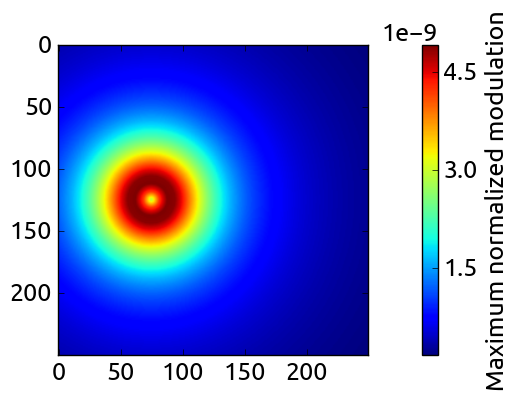

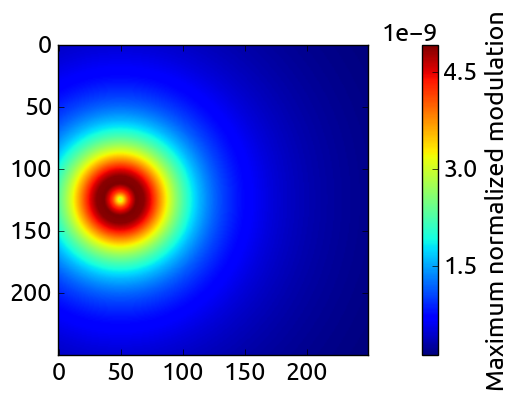

In [50]:
# Save images
print(path)

images_fft = []
for index, item in enumerate(images_div):
    print(index)
    images_fft.append(fft_gauss(item, 3)[0])
#save_2dimages (images_fft, filenames, path, "_fft", ".png", vmin=None, vmax=None, cb=1, clabel='Normalized intensity')

save_2dimages (XY_Prof_Sens, filenames, path, "_sens_z1_ro", ".png", vmin=None, vmax=None, cb=1, clabel='Maximum normalized modulation')